In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('Loan eligibility.csv')

In [3]:
df.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0


# Handling Null values

In [4]:
df.isnull().sum()

Unnamed: 0            0
Loan_ID               0
Gender                9
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       41
Property_Area         0
Loan_Status           0
Total_Income          0
dtype: int64

In [5]:
print('Data rows: ',len(df))

Data rows:  500


<AxesSubplot:>

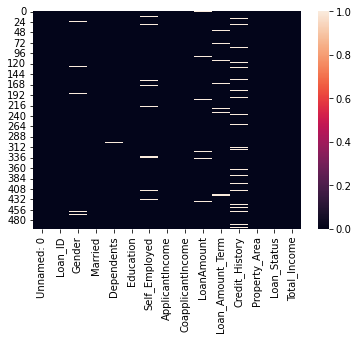

In [6]:
sns.heatmap(df.isnull())

In [7]:
100 * df.isnull().sum()/len(df) 

Unnamed: 0           0.0
Loan_ID              0.0
Gender               1.8
Married              0.6
Dependents           2.4
Education            0.0
Self_Employed        5.4
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           3.6
Loan_Amount_Term     2.8
Credit_History       8.2
Property_Area        0.0
Loan_Status          0.0
Total_Income         0.0
dtype: float64

I don't want misclassification due to arbitary fill null values with the avarage because this is the loan eligibilty situation.

In [8]:
df.dropna(inplace=True)
print(len(df))

390


####   Dropping useless columns

In [9]:
df.columns

Index(['Unnamed: 0', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income'],
      dtype='object')

In [10]:
df.drop(['Unnamed: 0','Loan_ID'],axis=1,inplace=True)

# Feature Enginnering

Let's make total income column which has object datatype to int datatype with removing $

In [11]:
def Convert_income(income):
    converted = []
    for i in df['Total_Income']:
        try:
            converted.append(float(i[1:]))
        except:
            converted.append(int(i[1:]))
    return converted

In [12]:
Convert_income(df['Total_Income'])[:10]
df['Total_Income'] = Convert_income(df['Total_Income'])

Let's convert object datatype to integer datatype for model training

In [13]:
object_ = df.select_dtypes(include='object')
pd.get_dummies(object_,drop_first=True)

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
1,1,1,1,0,0,0,0,0,0,0
2,1,1,0,0,0,0,1,0,1,1
3,1,1,0,0,0,1,0,0,1,1
4,1,0,0,0,0,0,0,0,1,1
5,1,1,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
494,1,1,0,0,0,0,0,0,0,0
495,0,1,1,0,0,0,0,1,0,1
496,1,1,0,0,0,1,0,0,0,1
498,1,1,1,0,0,0,1,1,0,1


In [14]:
Obj = pd.get_dummies(object_,drop_first=True)

# to separate integer datatype column to later concating new datafream.
num = df.select_dtypes(exclude='object')

In [15]:
df = pd.concat([Obj,num],axis=1)
df.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income
1,1,1,1,0,0,0,0,0,0,0,4583,1508.0,128.0,360.0,1.0,6091.0
2,1,1,0,0,0,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,3000.0
3,1,1,0,0,0,1,0,0,1,1,2583,2358.0,120.0,360.0,1.0,4941.0
4,1,0,0,0,0,0,0,0,1,1,6000,0.0,141.0,360.0,1.0,6000.0
5,1,1,0,1,0,0,1,0,1,1,5417,4196.0,267.0,360.0,1.0,9613.0


# EDA

Let's understand the data

<AxesSubplot:>

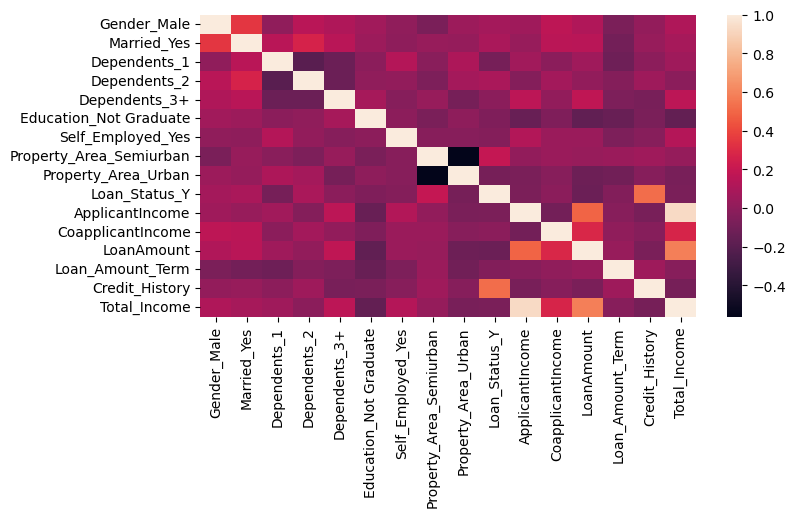

In [16]:
plt.figure(figsize=(8,4),dpi=100)
sns.heatmap(df.corr())

We found multiple co-relationship with different fctores. 

1) we can see that, Credit history had significant impact on loan apporoval

2) propert area was the secound important factore for loan apporoval.

3) Apllicant income and loan amount also have high co-relationship.

4) similarly, Co-Apllicant income and loan amount also have co-relationship.

Text(0.5, 1.0, 'Loan acceptance')

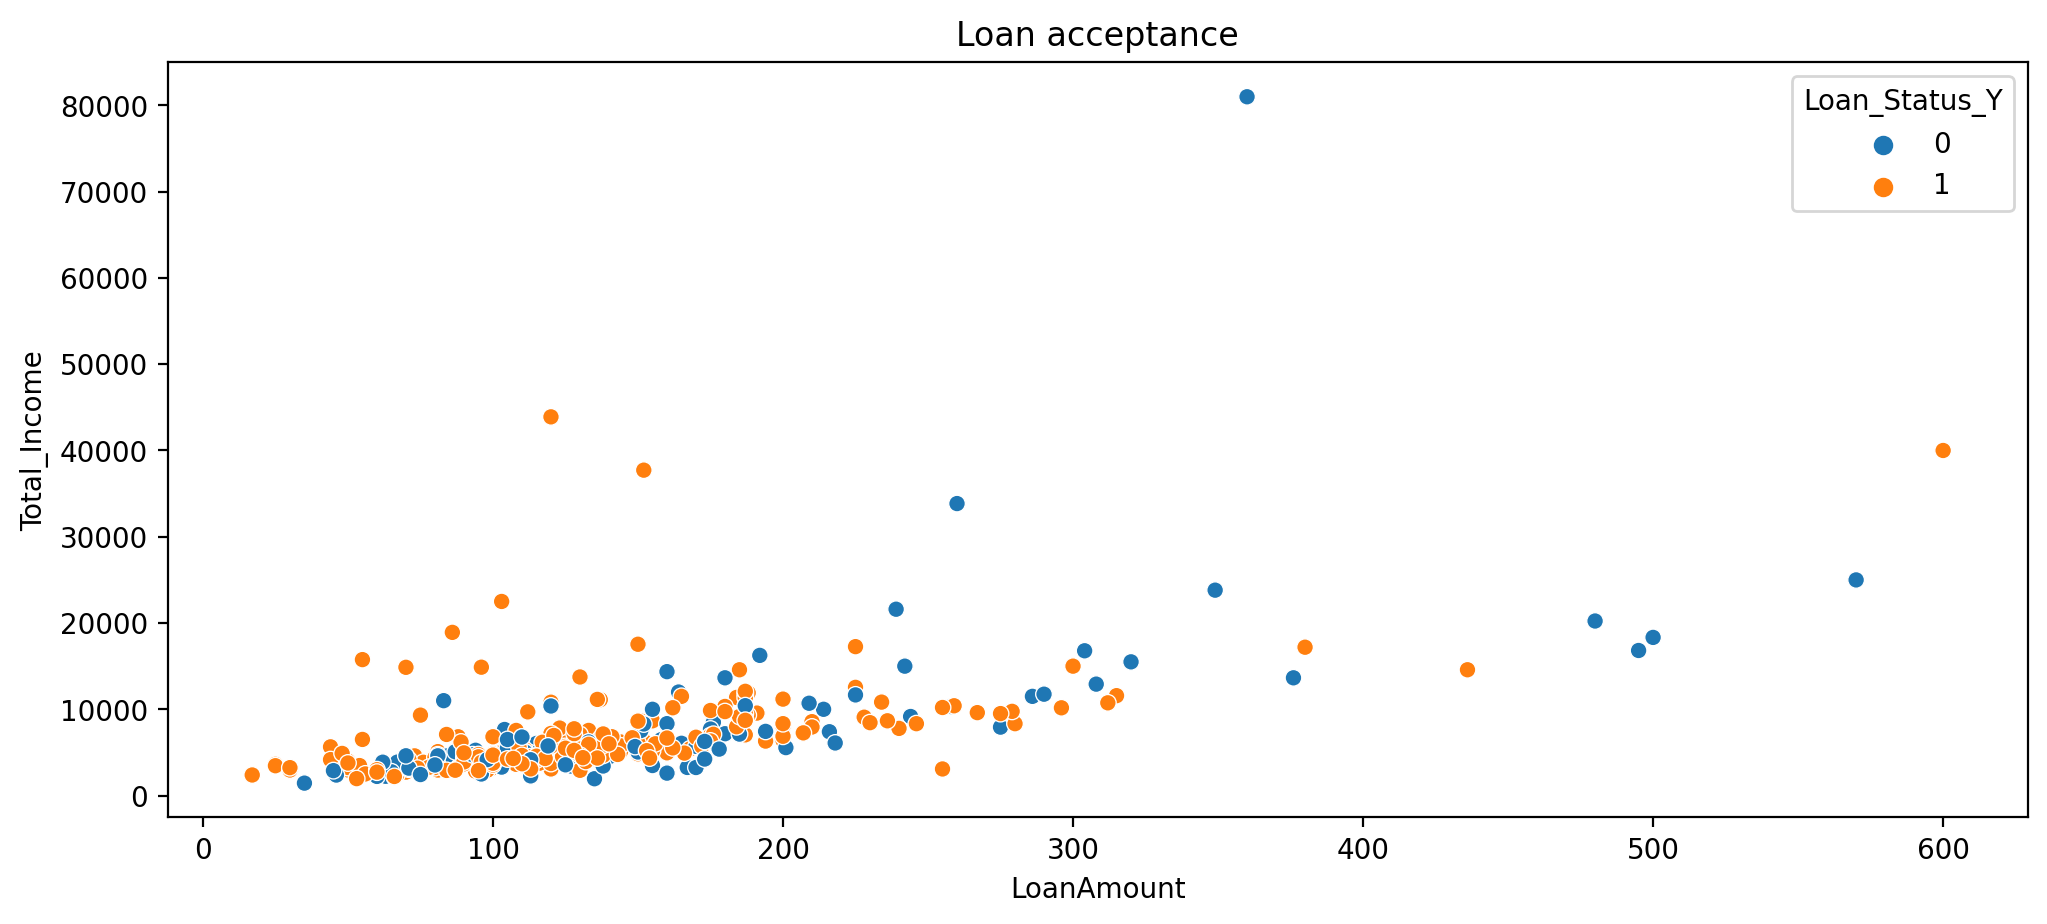

In [17]:
plt.figure(figsize=(12,5),dpi=200)
sns.scatterplot(x=df['LoanAmount'],y=df['Total_Income'],hue=df['Loan_Status_Y'])
plt.title('Loan acceptance')

Well, Above grpah explains that as you have more total income, Then obviously, you are going to get loan although, some people did mpt get the loan even though they had good income which means different factores also had inpacted on getting loan.  

Furthermore, Avarage income people mostely got the loan, However, as loan amount goes high applicant did not get loan.

In this data set we have some outliers, that migh reduce model accuracy.

Text(0.5, 1.0, 'Loan acceptance')

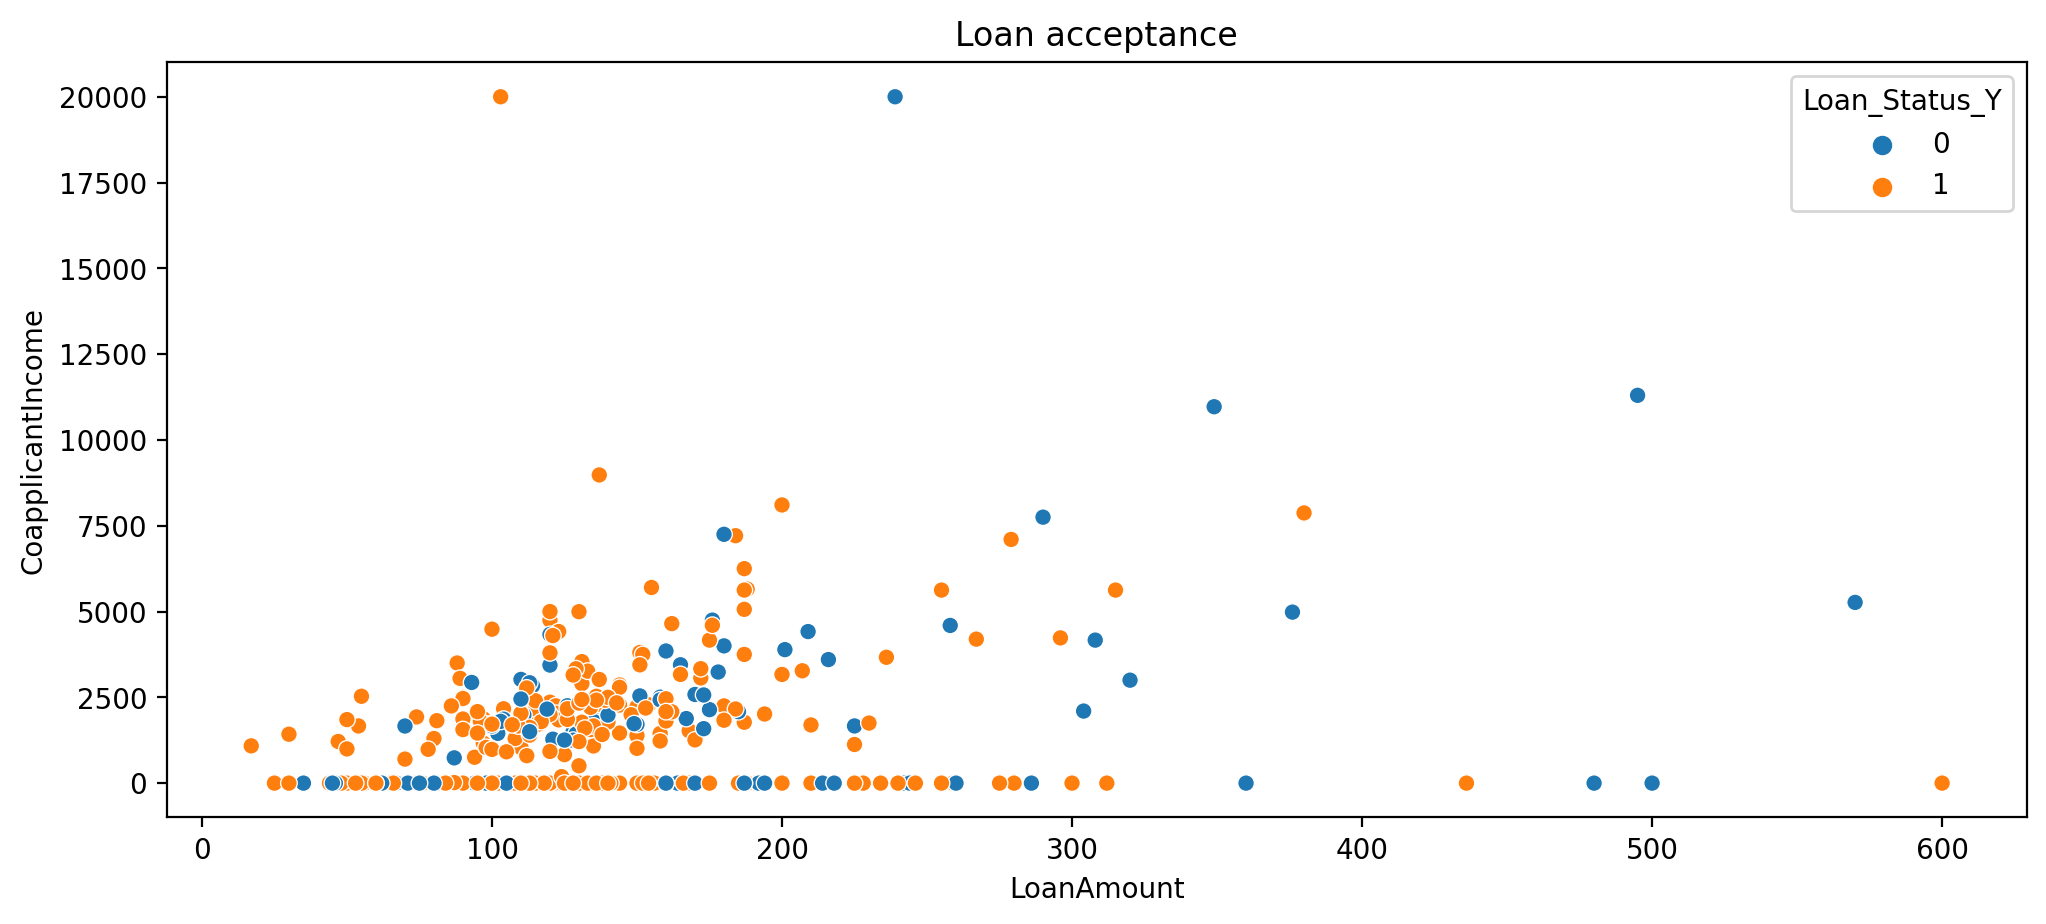

In [18]:
plt.figure(figsize=(12,5),dpi=200)
sns.scatterplot(x=df['LoanAmount'],y=df['CoapplicantIncome'],hue=df['Loan_Status_Y'])
plt.title('Loan acceptance')

In above graph, 

1) We can see the CoapplicantIncome which had more income then 1000$ was able to get loan to applicant.

2) Although, some CoapplicantIncome had low income or no income, Despite that fact, appllicant got the loan.

3) Here, we also have exceptional cases which are outliers in the dataset.

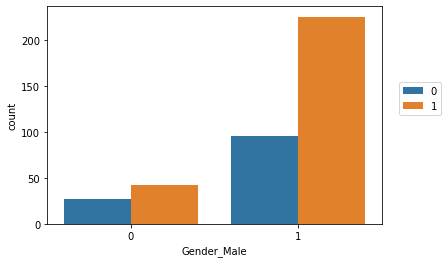

In [19]:
sns.countplot(df['Gender_Male'],hue=df['Loan_Status_Y'])
plt.legend(loc=(1.05,0.5))

1) Male applicant were able to get more loan then Female

2) Female applicant had less loan disapporal rate then male

3) Male applicant had applied more then Female applicant 

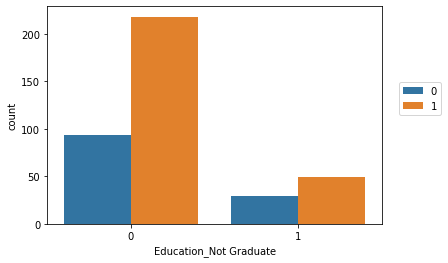

In [20]:
sns.countplot(df['Education_Not Graduate'],hue=df['Loan_Status_Y'])
plt.legend(loc=(1.05,0.5))

1) Applicant who were not completed their eduction got the most of the loan apporoval

2) Graduated applicant had applied less then not graduated applicant.

3) Probabliy, the applicant who got loan without completing their graduction, because they got loan for graduction studies

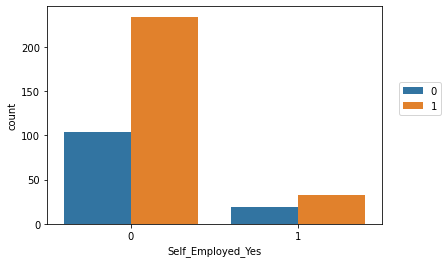

In [21]:
sns.countplot(df['Self_Employed_Yes'],hue=df['Loan_Status_Y'])
plt.legend(loc=(1.05,0.5))

1) Unemployed applicant did not get the loan as compared to employed applicant.

2) Although some unemployed applicant got the loan, probabliy other factore had affected on their loan apporoval. such as coapplicant income or credit history.

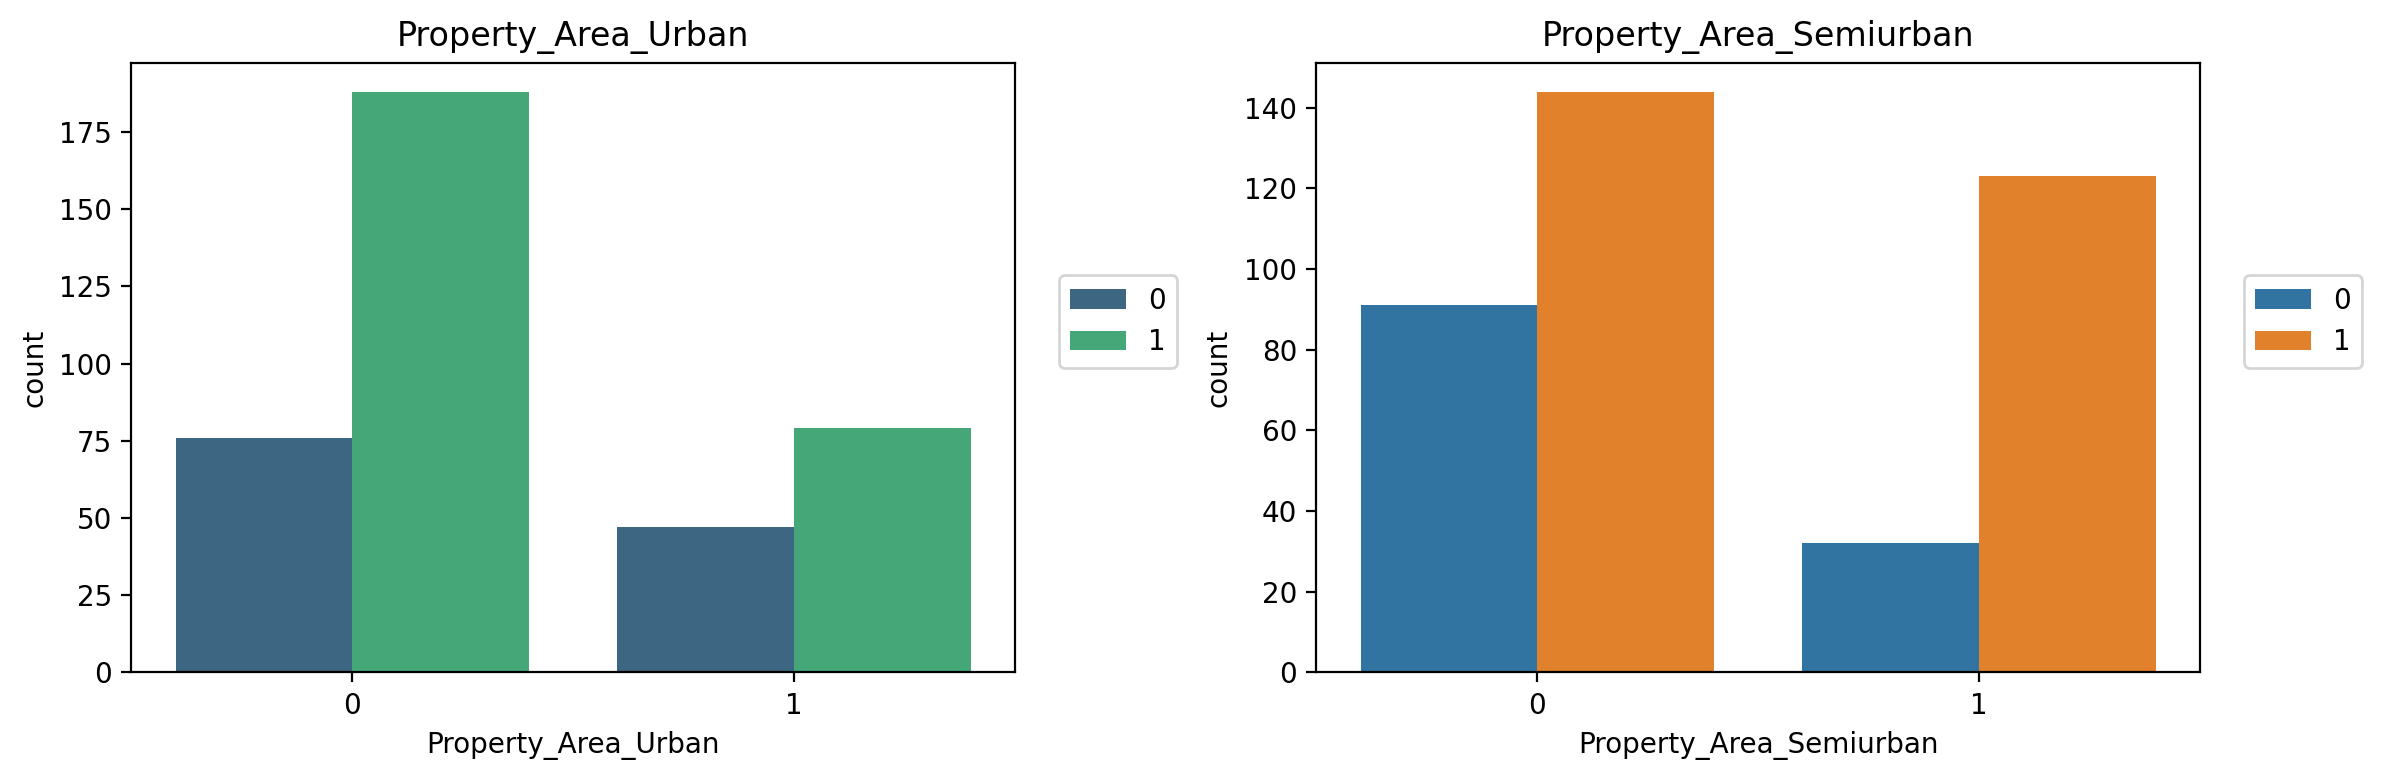

In [22]:
fig,axes = plt.subplots(1,2,figsize=(12,4),dpi=200)

sns.countplot(df['Property_Area_Urban'],hue=df['Loan_Status_Y'],ax=axes[0],palette='viridis')
axes[0].set_title('Property_Area_Urban')


sns.countplot(df['Property_Area_Semiurban'],hue=df['Loan_Status_Y'],ax=axes[1])
axes[1].set_title('Property_Area_Semiurban')

axes[0].legend(loc=(1.05,0.5))
axes[1].legend(loc=(1.05,0.5))

plt.tight_layout()

1) Applicant who were not belonged to Urban area, got loan and loan disapporoval rate also was low.

2)  Applicant who were not belonged to Semiurban area got loan as well as applicant who were belonged to semiurban area also got the loan, means most of the loan approval was for Semiurban area applicant.


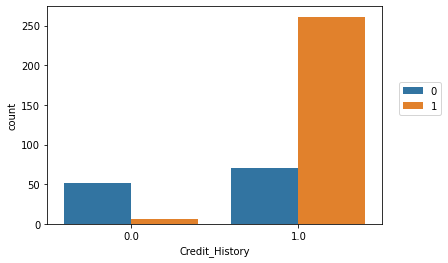

In [23]:
sns.countplot(df['Credit_History'],hue=df['Loan_Status_Y'])
plt.legend(loc=(1.05,0.5))

1) We can see the most of applicant who had credit history got the loan.

2) No credit history applicant did not get the loan as compared to applicant who had the credit history.

3) some exceptional cases also explained without credit history applicant got the loan.

4) applicant who had credit history also did not get loan for some applicant. 

#### Outliers analysis

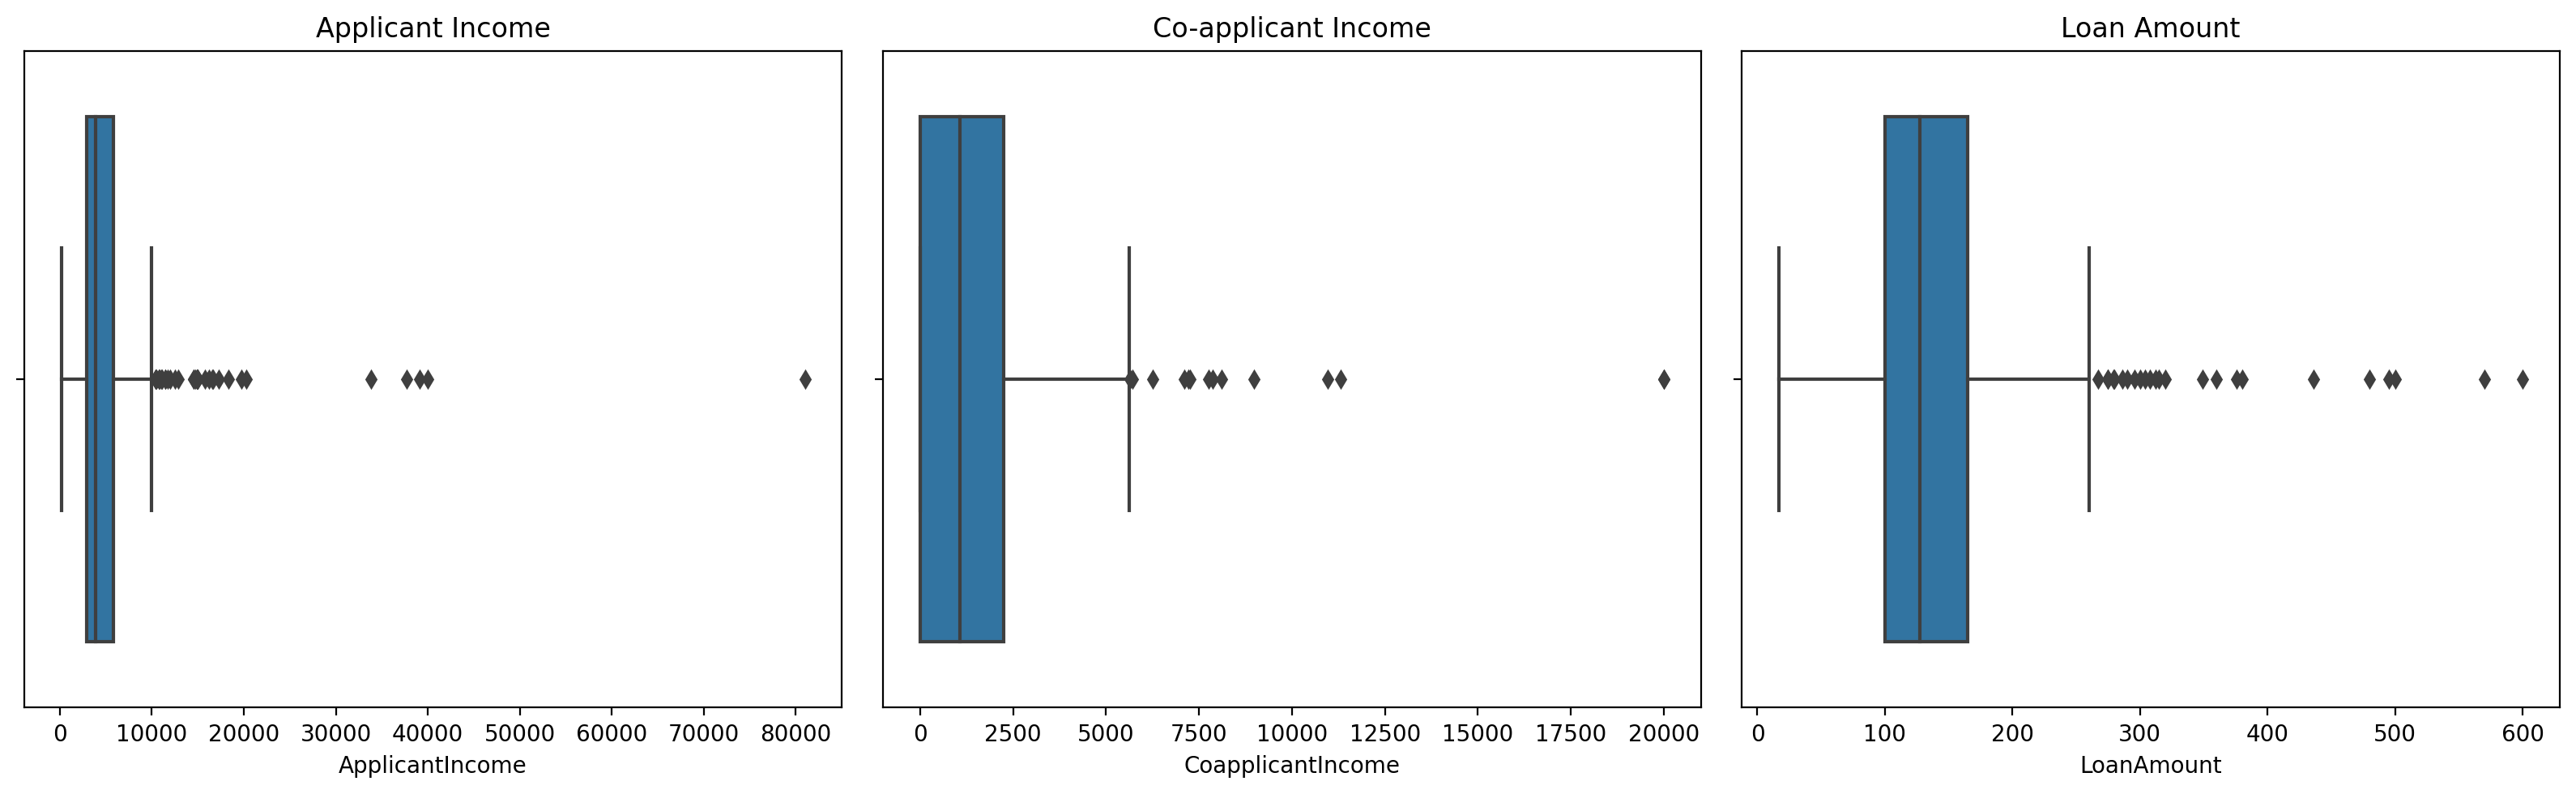

In [24]:
fig,axes = plt.subplots(1,3,figsize=(16,5),dpi=200)


axes[0].set_title('Applicant Income')
sns.boxplot(df['ApplicantIncome'],ax=axes[0])

axes[1].set_title('Co-applicant Income')
sns.boxplot(df['CoapplicantIncome'],ax=axes[1])

axes[2].set_title('Loan Amount')
sns.boxplot(df['LoanAmount'],ax=axes[2])

plt.tight_layout()

1) In aoolicant income: Many applicant have above income then $10k which is being outliers, but we can not remove them directely. specifically we have to choose some number of outliers which are to far from Interquartile range (IQR).

A small interquartile range (IQR) means that the middle 50% of the data is concentrated within a narrow range of values. This can occur if the data is relatively homogeneous, with few outliers or extreme values. A small IQR can indicate that the data is relatively symmetrical and does not have a long tail on either side, which would indicate the presence of outliers.

2) In co-applicant graph:  the IQR does not have a 25% value, it means that the data is not evenly distributed within the range defined by Q1 and Q3. This can occur if the data is skewed or if there are outliers present in the dataset.

if the IQR does not have a 25% value, it could mean that the data is not evenly distributed within this range. For example, the data may be concentrated in the lower part of the range, in which case the 25th percentile would be lower than Q1, or the data may be concentrated in the upper part of the range, in which case the 75th percentile would be higher than Q3.

In general, a non-25% IQR can indicate that the data is not symmetrically distributed and may be skewed or have outliers. In such cases, it may be necessary to analyze the data further and consider how these factors may impact the results of any analysis or interpretation of the data.

#### Removing outliers

There is no one-size-fits-all standard procedure for removing outliers, as the appropriate method will depend on the specific context and goals of the analysis. Outliers are observations that are significantly different from the majority of the data and can have a significant impact on the results of an analysis. However, it is important to be careful when removing outliers, as they may contain valuable information and their removal can sometimes distort the results.

Here are some general considerations for removing outliers:

Identify the outliers: The first step in removing outliers is to identify which observations are outliers. This can be done using statistical techniques such as box plots, which can help to identify observations that are significantly different from the rest of the data.

Investigate the outliers: Once the outliers have been identified, it is important to investigate why they are different from the rest of the data. This can help to determine whether the outliers are legitimate observations that should be included in the analysis, or whether they are errors or anomalies that can be safely removed.

Determine the appropriate action: Based on the results of the investigation, you can determine the appropriate action to take with the outliers. If the outliers are legitimate observations that are important to the analysis, they should be included in the analysis. If the outliers are errors or anomalies that can be safely removed, you can exclude them from the analysis.


#### Procceding eliminating outliers

# Data preparing

In [25]:
X = df.drop('Loan_Status_Y',axis=1)

In [26]:
y = df['Loan_Status_Y']

# Train test split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Feature scaling

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Model training 

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
Random_forest = RandomForestClassifier(n_estimators=550,max_depth=5)
Random_forest.fit(X_train,y_train)
Random_prediction = Random_forest.predict(X_test)

In [33]:
print(classification_report(y_test,Random_prediction))

              precision    recall  f1-score   support

           0       0.95      0.45      0.61        40
           1       0.78      0.99      0.87        77

    accuracy                           0.80       117
   macro avg       0.86      0.72      0.74       117
weighted avg       0.83      0.80      0.78       117



In [34]:
SVM = SVC(kernel='rbf',C=1)
SVM.fit(X_train,y_train)
SVM_prediction_ = SVM.predict(X_test)

In [35]:
print(classification_report(y_test,SVM_prediction_))

              precision    recall  f1-score   support

           0       0.94      0.42      0.59        40
           1       0.77      0.99      0.86        77

    accuracy                           0.79       117
   macro avg       0.86      0.71      0.72       117
weighted avg       0.83      0.79      0.77       117



In [36]:
Logistic = LogisticRegression()
Logistic.fit(X_train,y_train)
Logistic_prediction = Logistic.predict(X_test)

In [37]:
print(classification_report(y_test,Logistic_prediction))

              precision    recall  f1-score   support

           0       0.73      0.47      0.58        40
           1       0.77      0.91      0.83        77

    accuracy                           0.76       117
   macro avg       0.75      0.69      0.70       117
weighted avg       0.76      0.76      0.75       117



According to accuracy and precision of the Random forest model i have decided to go with random forest model.

In [ ]:
Random_forest = RandomForestClassifier(n_estimators=550,max_depth=5)

In [38]:
import joblib

New applicant

In [61]:
X[6:7]

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income
7,1,1,0,0,1,0,0,1,0,3036,2504.0,158.0,360.0,0.0,5540.0


In [59]:
scaler.transform(X[6:7])

array([[ 0.48507125,  0.77838445, -0.45015905, -0.4203857 ,  3.22102468,
        -0.50800051, -0.37717292,  1.21729954, -0.69548232, -0.38205782,
         0.38054856,  0.16328686,  0.26658227, -2.41350368, -0.24386825]])

# Model deployment

In [60]:
Random_forest.predict(scaler.transform(X[6:7]))

array([0], dtype=uint8)

In [81]:
joblib.dump(Random_forest,'Random forest model_.pkl')

['Random forest model_.pkl']

In [72]:
joblib.dump(scaler,'scaler_.pkl')

['scaler_.pkl']

# Model loading

In [73]:
sc = joblib.load('scaler_.pkl')

In [74]:
sc.transform(X[6:7])

array([[ 0.48507125,  0.77838445, -0.45015905, -0.4203857 ,  3.22102468,
        -0.50800051, -0.37717292,  1.21729954, -0.69548232, -0.38205782,
         0.38054856,  0.16328686,  0.26658227, -2.41350368, -0.24386825]])

In [82]:
r = joblib.load('Random forest model_.pkl')

In [78]:
r.predict(sc.transform(X[6:7]))

array([0], dtype=uint8)

Below is the classification (0 or 1)

In [79]:
np.squeeze(r.predict(sc.transform(X[6:7])))

array(0, dtype=uint8)